# Data Preprocessing

Importing libraries

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, roc_auc_score, auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Processing df

In [2]:
# Read the CSV file and set the first row as the header
df_original = pd.read_csv('diabetes.csv', header=0)

# Set the outcome variable
y = df_original.iloc[:,0]

# Create a new DataFrame with selected columns
df = df_original.iloc[:,1:17].copy()  # Use .copy() to create a new DataFrame

# Map 'BiologicalSex' to 'IsMale'
df['IsMale'] = df_original['BiologicalSex'].map({1: 1, 2: 0})

# Append the last 4 columns of df_original to df
df = pd.concat([df, df_original.iloc[:, -4:]], axis=1)

# Standardize all columns
df = df.apply(stats.zscore)

# Show the first 5 rows of the DataFrame
df.head()

,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,IsMale,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1.153688,1.165254,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,-0.244014,...,-0.303173,2.329121,1.998592,1.233999,2.223615,0.887021,0.316900,-1.065595,-1.474487,1.012214
1,-0.866785,-0.858182,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,-0.244014,...,3.298445,0.457294,-0.429630,-0.486592,-0.449718,0.887021,-0.337933,0.963272,-2.440138,1.301781
2,1.153688,1.165254,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,-0.244014,...,3.298445,2.329121,3.617407,2.954590,2.223615,0.887021,0.316900,-1.065595,0.939638,-1.304317
3,1.153688,-0.858182,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,...,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,0.887021,0.971733,-2.080028,-0.026012,1.301781
4,1.153688,1.165254,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,...,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,0.887021,0.971733,-0.051162,-0.991662,0.433081


In [3]:
# Set the predictor variables
X=df
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HighBP                 253680 non-null  float64
 1   HighChol               253680 non-null  float64
 2   BMI                    253680 non-null  float64
 3   Smoker                 253680 non-null  float64
 4   Stroke                 253680 non-null  float64
 5   Myocardial             253680 non-null  float64
 6   PhysActivity           253680 non-null  float64
 7   Fruit                  253680 non-null  float64
 8   Vegetables             253680 non-null  float64
 9   HeavyDrinker           253680 non-null  float64
 10  HasHealthcare          253680 non-null  float64
 11  NotAbleToAffordDoctor  253680 non-null  float64
 12  GeneralHealth          253680 non-null  float64
 13  MentalHealth           253680 non-null  float64
 14  PhysicalHealth         253680 non-nu

Split the data into train and test

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3959)

# Question 1

In [5]:
log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print('Logistic Regression Accuracy: %.2f' % acc_log)
y_prob_log = log.predict_proba(X_test)[:,1]
auroc_log = roc_auc_score(y_test, y_prob_log)
print('Logistic Regression AUROC: %.2f' % auroc_log)
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)
auprc_log = auc(recall_log, precision_log)
print('Logistic Regression AUPRC: %.2f' % auprc_log)

Logistic Regression Accuracy: 0.86
Logistic Regression AUROC: 0.82
Logistic Regression AUPRC: 0.41


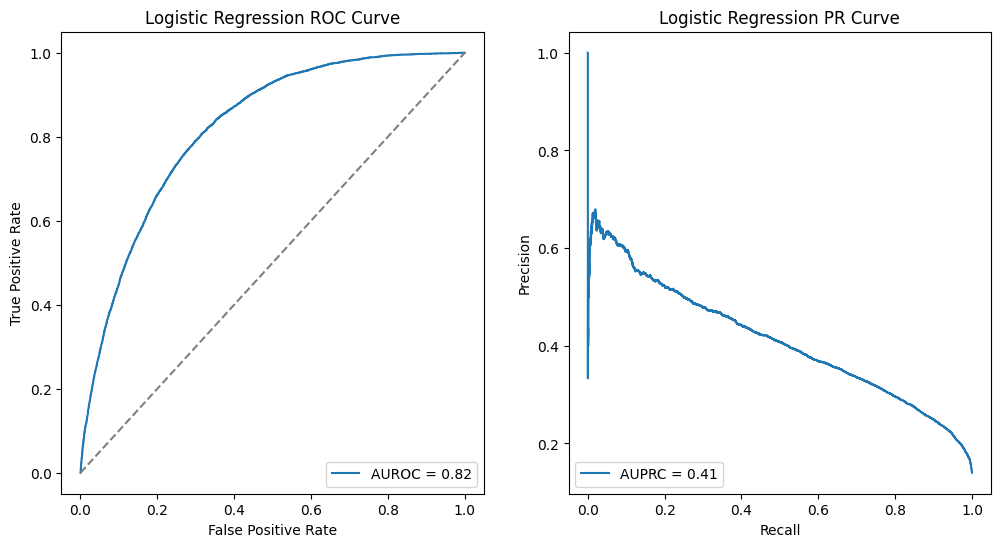

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
axes[0].plot(fpr_log, tpr_log, label=f'AUROC = {auroc_log:.2f}')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression ROC Curve')
axes[0].plot([0, 1], [0, 1], '--', color='gray')
axes[0].legend(loc='lower right')

axes[1].plot(recall_log, precision_log, label=f'AUPRC = {auprc_log:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Logistic Regression PR Curve')
axes[1].legend(loc='lower left')

plt.show()

In [7]:
# Access the coefficients (weights) assigned to the variables
log_coef = log.coef_

# Get the variable names
var_names = X_train.columns 

# Create a DataFrame to display feature names and their corresponding coefficients
var_comparison_df = pd.DataFrame({'Variable': var_names, 'Logistic_Coefficient': log_coef[0]})
print(var_comparison_df)

                 Variable  Logistic_Coefficient
0                  HighBP              0.191410
1                HighChol              0.146992
2                     BMI              0.199271
3                  Smoker             -0.004317
4                  Stroke              0.012380
5              Myocardial              0.034067
6            PhysActivity             -0.007453
7                   Fruit             -0.012439
8              Vegetables             -0.004851
9            HeavyDrinker             -0.089559
10          HasHealthcare              0.017707
11  NotAbleToAffordDoctor              0.002811
12          GeneralHealth              0.288410
13           MentalHealth             -0.013432
14         PhysicalHealth             -0.033460
15      HardToClimbStairs              0.022254
16                 IsMale             -0.061897
17             AgeBracket              0.189822
18       EducationBracket             -0.015004
19          IncomeBracket             -0

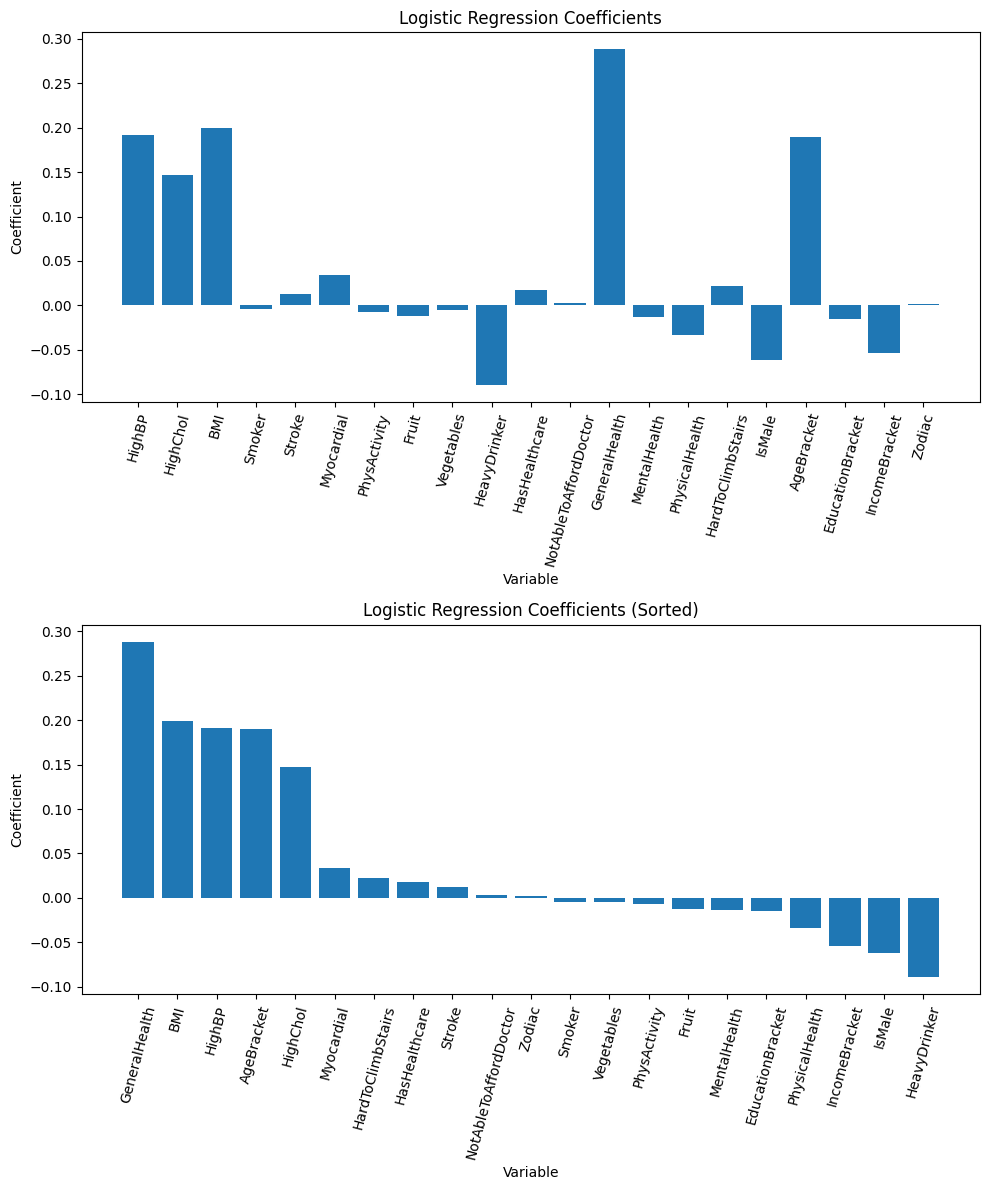

In [8]:
# Plot the coefficients
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.flatten()

axes[0].bar(var_comparison_df['Variable'], var_comparison_df['Logistic_Coefficient'])
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Coefficient')
axes[0].set_title('Logistic Regression Coefficients')
axes[0].tick_params(axis='x', rotation=75)

# Sort from high to low
sorted_log_coef = var_comparison_df.sort_values(by='Logistic_Coefficient', ascending=False)
axes[1].bar(sorted_log_coef['Variable'], sorted_log_coef['Logistic_Coefficient'])
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Coefficient')
axes[1].set_title('Logistic Regression Coefficients (Sorted)')
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

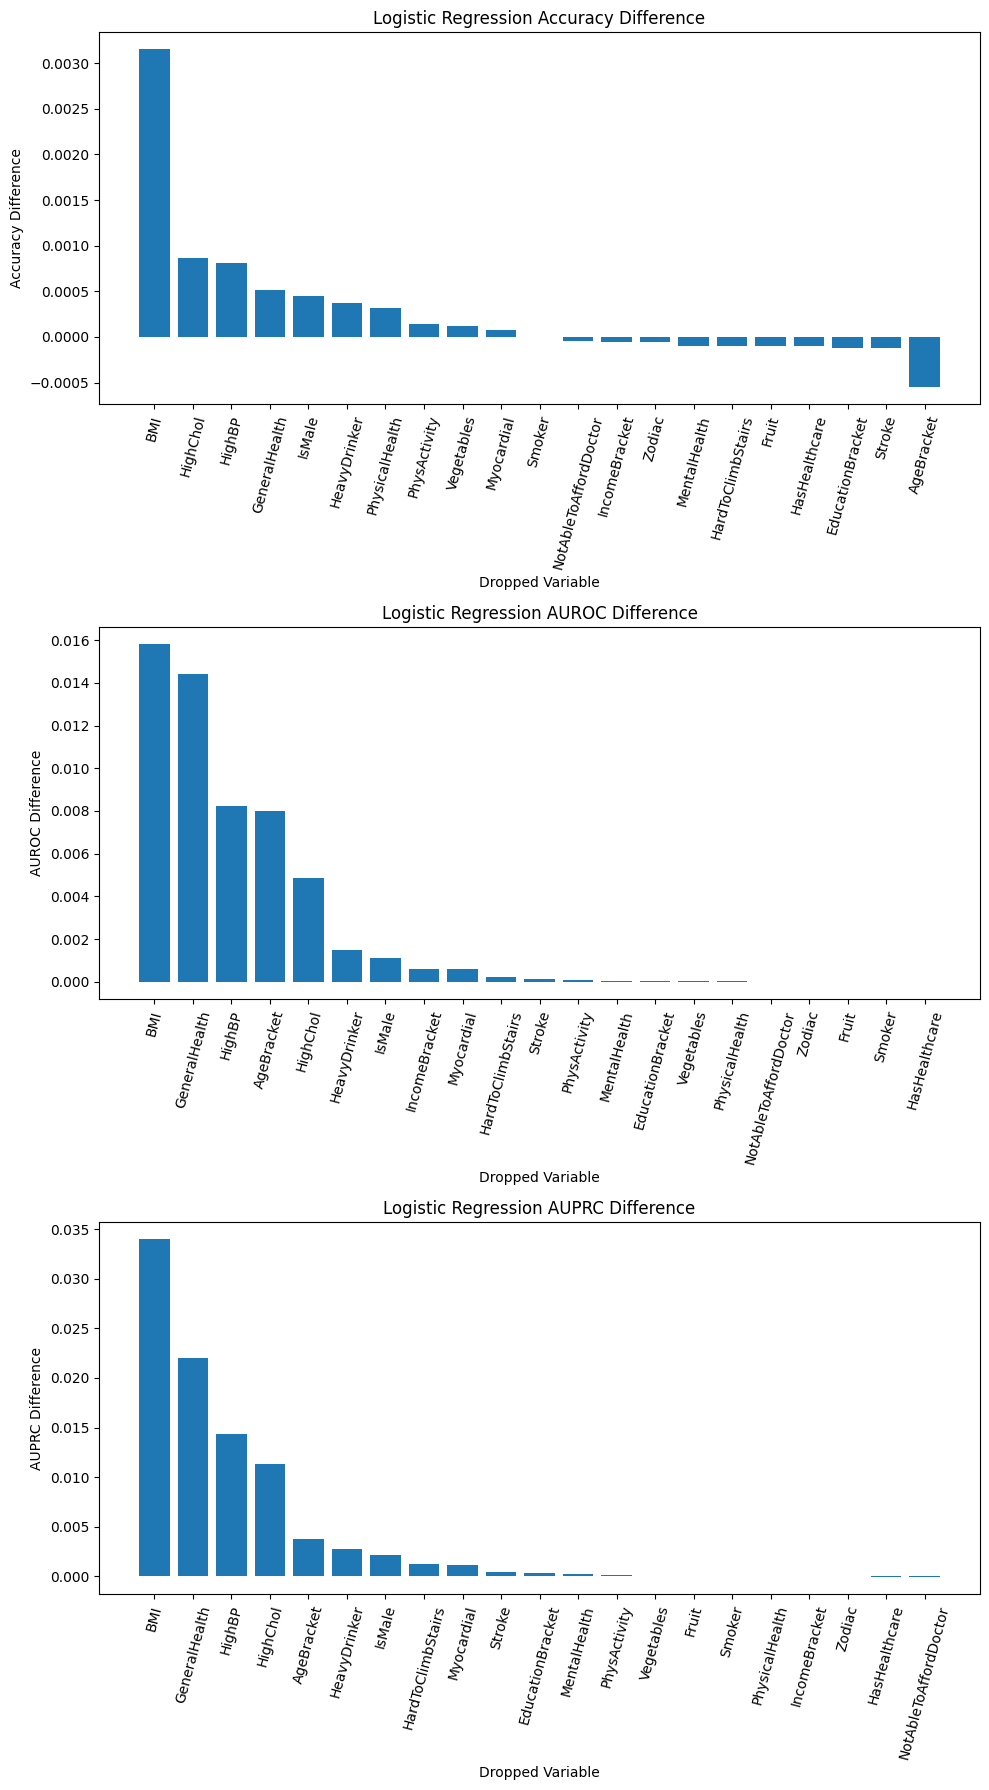

In [9]:
acc_log_diffs = []
auroc_log_diffs = []
auprc_log_diffs = []

for column in X:
    df_temp = X.drop(column, axis=1)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp, y, test_size=0.2, random_state=3959)
    log_temp = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    log_temp.fit(X_train_temp, y_train_temp)
    y_pred_log_temp = log_temp.predict(X_test_temp)
    acc_log_temp = accuracy_score(y_test_temp, y_pred_log_temp)
    acc_log_diff = acc_log - acc_log_temp
    acc_log_diffs.append(acc_log_diff)
    y_prob_log_temp = log_temp.predict_proba(X_test_temp)[:,1]
    auroc_log_temp = roc_auc_score(y_test_temp, y_prob_log_temp)
    auroc_log_diff = auroc_log - auroc_log_temp
    auroc_log_diffs.append(auroc_log_diff)
    precision_log_temp, recall_log_temp, _ = precision_recall_curve(y_test_temp, y_prob_log_temp)
    auprc_log_temp = auc(recall_log_temp, precision_log_temp)
    auprc_log_diff = auprc_log - auprc_log_temp
    auprc_log_diffs.append(auprc_log_diff)

diff_comparison_df = pd.DataFrame({'Dropped_Variable': var_names, 
                                   'Logistic_Accuracy_Difference': acc_log_diffs, 
                                   'Logistic_AUROC_Difference': auroc_log_diffs, 
                                   'Logistic_AUPRC_Difference': auprc_log_diffs})

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sorted_log_acc_diffs = diff_comparison_df.sort_values(by='Logistic_Accuracy_Difference', ascending=False)
sorted_log_auroc_diffs = diff_comparison_df.sort_values(by='Logistic_AUROC_Difference', ascending=False)
sorted_log_auprc_diffs = diff_comparison_df.sort_values(by='Logistic_AUPRC_Difference', ascending=False)

axes[0].bar(sorted_log_acc_diffs['Dropped_Variable'], sorted_log_acc_diffs['Logistic_Accuracy_Difference'])
axes[0].set_xlabel('Dropped Variable')
axes[0].set_ylabel('Accuracy Difference')
axes[0].set_title('Logistic Regression Accuracy Difference')
axes[0].tick_params(axis='x', rotation=75)

axes[1].bar(sorted_log_auroc_diffs['Dropped_Variable'], sorted_log_auroc_diffs['Logistic_AUROC_Difference'])
axes[1].set_xlabel('Dropped Variable')
axes[1].set_ylabel('AUROC Difference')
axes[1].set_title('Logistic Regression AUROC Difference')
axes[1].tick_params(axis='x', rotation=75)

axes[2].bar(sorted_log_auprc_diffs['Dropped_Variable'], sorted_log_auprc_diffs['Logistic_AUPRC_Difference'])
axes[2].set_xlabel('Dropped Variable')
axes[2].set_ylabel('AUPRC Difference')
axes[2].set_title('Logistic Regression AUPRC Difference')
axes[2].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Question 2

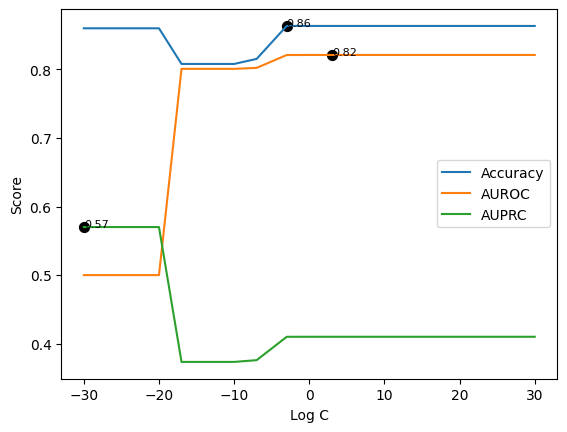

In [10]:
accs = []
aurocs = []
auprcs = []
max_points = {}
exponents = [-30,-27,-23,-20,-17,-13,-10,-7,-3,0,3,7,10,13,17,20,23,27,30]

for i in exponents:
    svm = LinearSVC(C=10**i, dual=False)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = svm.decision_function(X_test)
    auroc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    
    accs.append(acc)
    aurocs.append(auroc)
    auprcs.append(auprc)
    
    max_points['Accuracy'] = max(max_points.get('Accuracy', 0), acc)
    max_points['AUROC'] = max(max_points.get('AUROC', 0), auroc)
    max_points['AUPRC'] = max(max_points.get('AUPRC', 0), auprc)

plt.plot(exponents, accs, label='Accuracy')
plt.plot(exponents, aurocs, label='AUROC')
plt.plot(exponents, auprcs, label='AUPRC')

for score, value in max_points.items():
    if score == 'Accuracy':
        idx = accs.index(value)
    elif score == 'AUROC':
        idx = aurocs.index(value)
    elif score == 'AUPRC':
        idx = auprcs.index(value)
    plt.scatter(exponents[idx], value, color='black', marker='o', s=50)
    plt.text(exponents[idx], value, f'{value:.2f}', fontsize=8)

plt.xlabel('Log C')
plt.ylabel('Score')
plt.legend()
plt.show()

In [11]:
# Train the linear SVM
svm = LinearSVC(C = 10e-1, dual = False)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('Linear SVM Accuracy: %.2f' % acc_svm)
y_prob_svm = svm.decision_function(X_test)
auroc_svm = roc_auc_score(y_test, y_prob_svm)
print('Linear SVM AUROC: %.2f' % auroc_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
auprc_svm = auc(recall_svm, precision_svm)
print('Linear SVM AUPRC: %.2f' % auprc_svm)

Linear SVM Accuracy: 0.86
Linear SVM AUROC: 0.82
Linear SVM AUPRC: 0.41


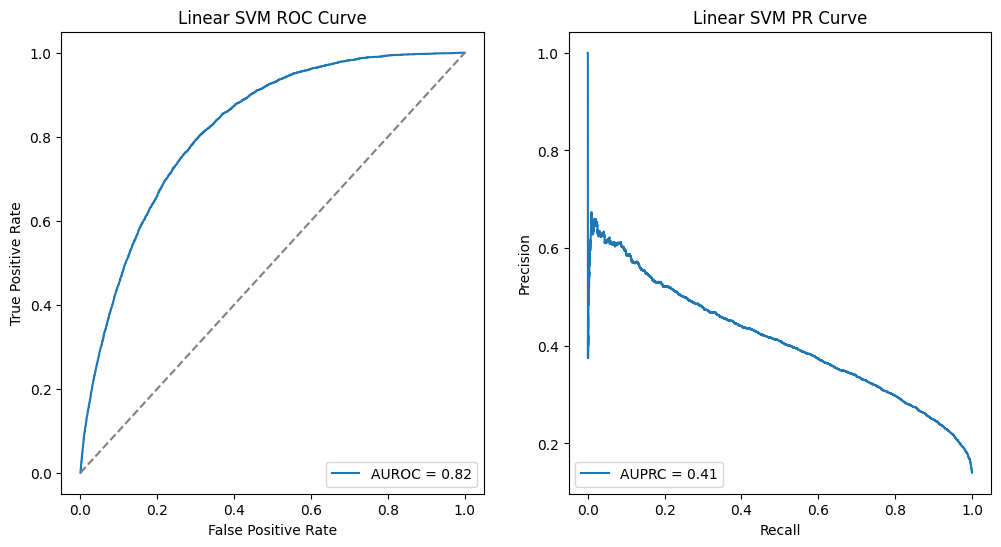

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
axes[0].plot(fpr_svm, tpr_svm, label=f'AUROC = {auroc_svm:.2f}')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Linear SVM ROC Curve')
axes[0].plot([0, 1], [0, 1], '--', color='gray')
axes[0].legend(loc='lower right')

axes[1].plot(recall_svm, precision_svm, label=f'AUPRC = {auprc_svm:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Linear SVM PR Curve')
axes[1].legend(loc='lower left')

plt.show()

In [13]:
# Access the coefficients (weights) assigned to the variables
svm_coef = svm.coef_
var_comparison_df['SVM_Coefficient'] = svm_coef[0]
print(var_comparison_df)

                 Variable  Logistic_Coefficient  SVM_Coefficient
0                  HighBP              0.191410         0.085066
1                HighChol              0.146992         0.072320
2                     BMI              0.199271         0.113552
3                  Smoker             -0.004317        -0.005369
4                  Stroke              0.012380         0.012218
5              Myocardial              0.034067         0.033072
6            PhysActivity             -0.007453        -0.004539
7                   Fruit             -0.012439        -0.004787
8              Vegetables             -0.004851        -0.001931
9            HeavyDrinker             -0.089559        -0.041055
10          HasHealthcare              0.017707         0.010954
11  NotAbleToAffordDoctor              0.002811        -0.001345
12          GeneralHealth              0.288410         0.142599
13           MentalHealth             -0.013432        -0.009389
14         PhysicalHealth

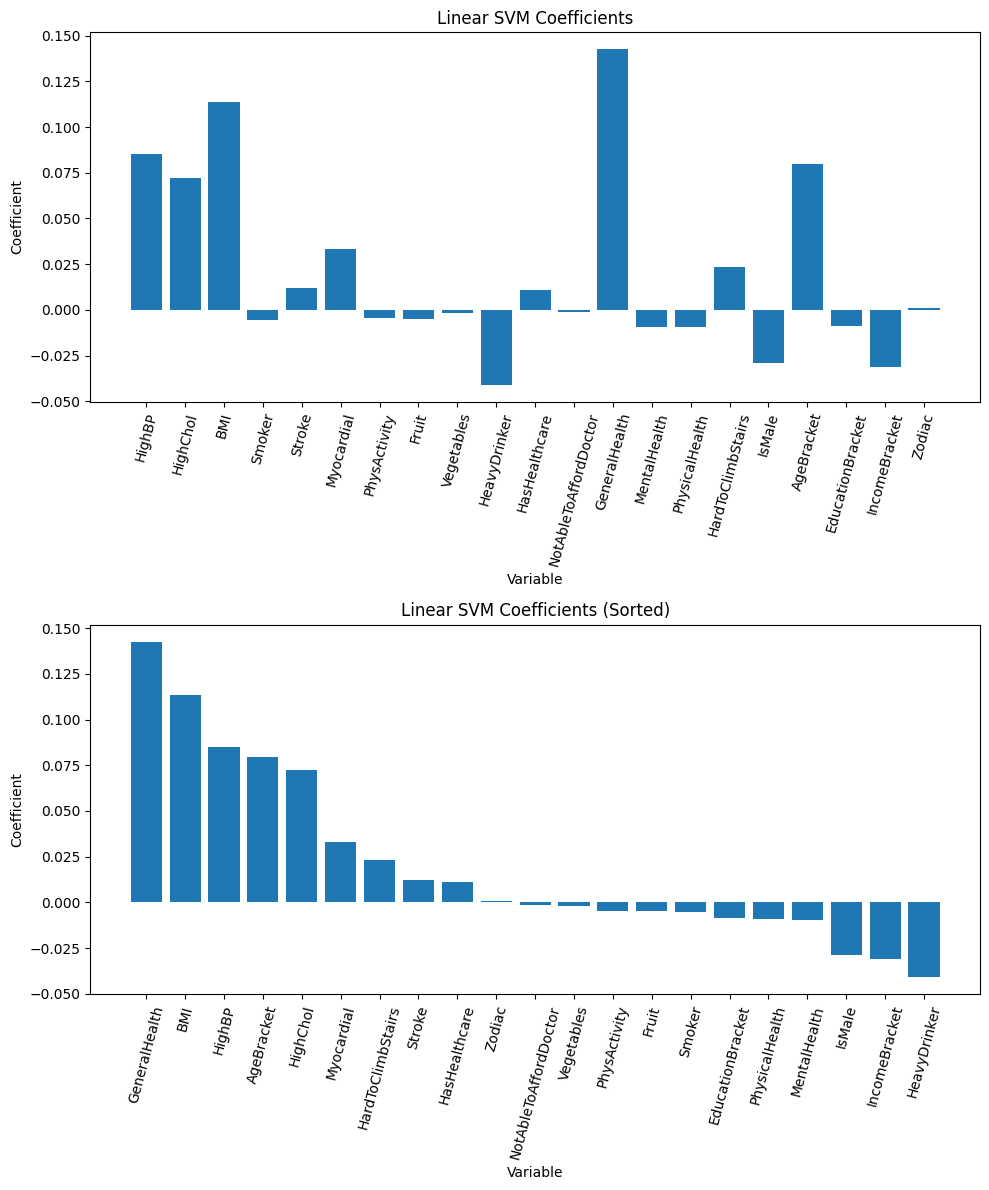

In [14]:
# Plot the coefficients
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.flatten()

axes[0].bar(var_comparison_df['Variable'], var_comparison_df['SVM_Coefficient'])
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Coefficient')
axes[0].set_title('Linear SVM Coefficients')
axes[0].tick_params(axis='x', rotation=75)

# Sort from high to low
sorted_svm_coef = var_comparison_df.sort_values(by='SVM_Coefficient', ascending=False)
axes[1].bar(sorted_svm_coef['Variable'], sorted_svm_coef['SVM_Coefficient'])
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Coefficient')
axes[1].set_title('Linear SVM Coefficients (Sorted)')
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

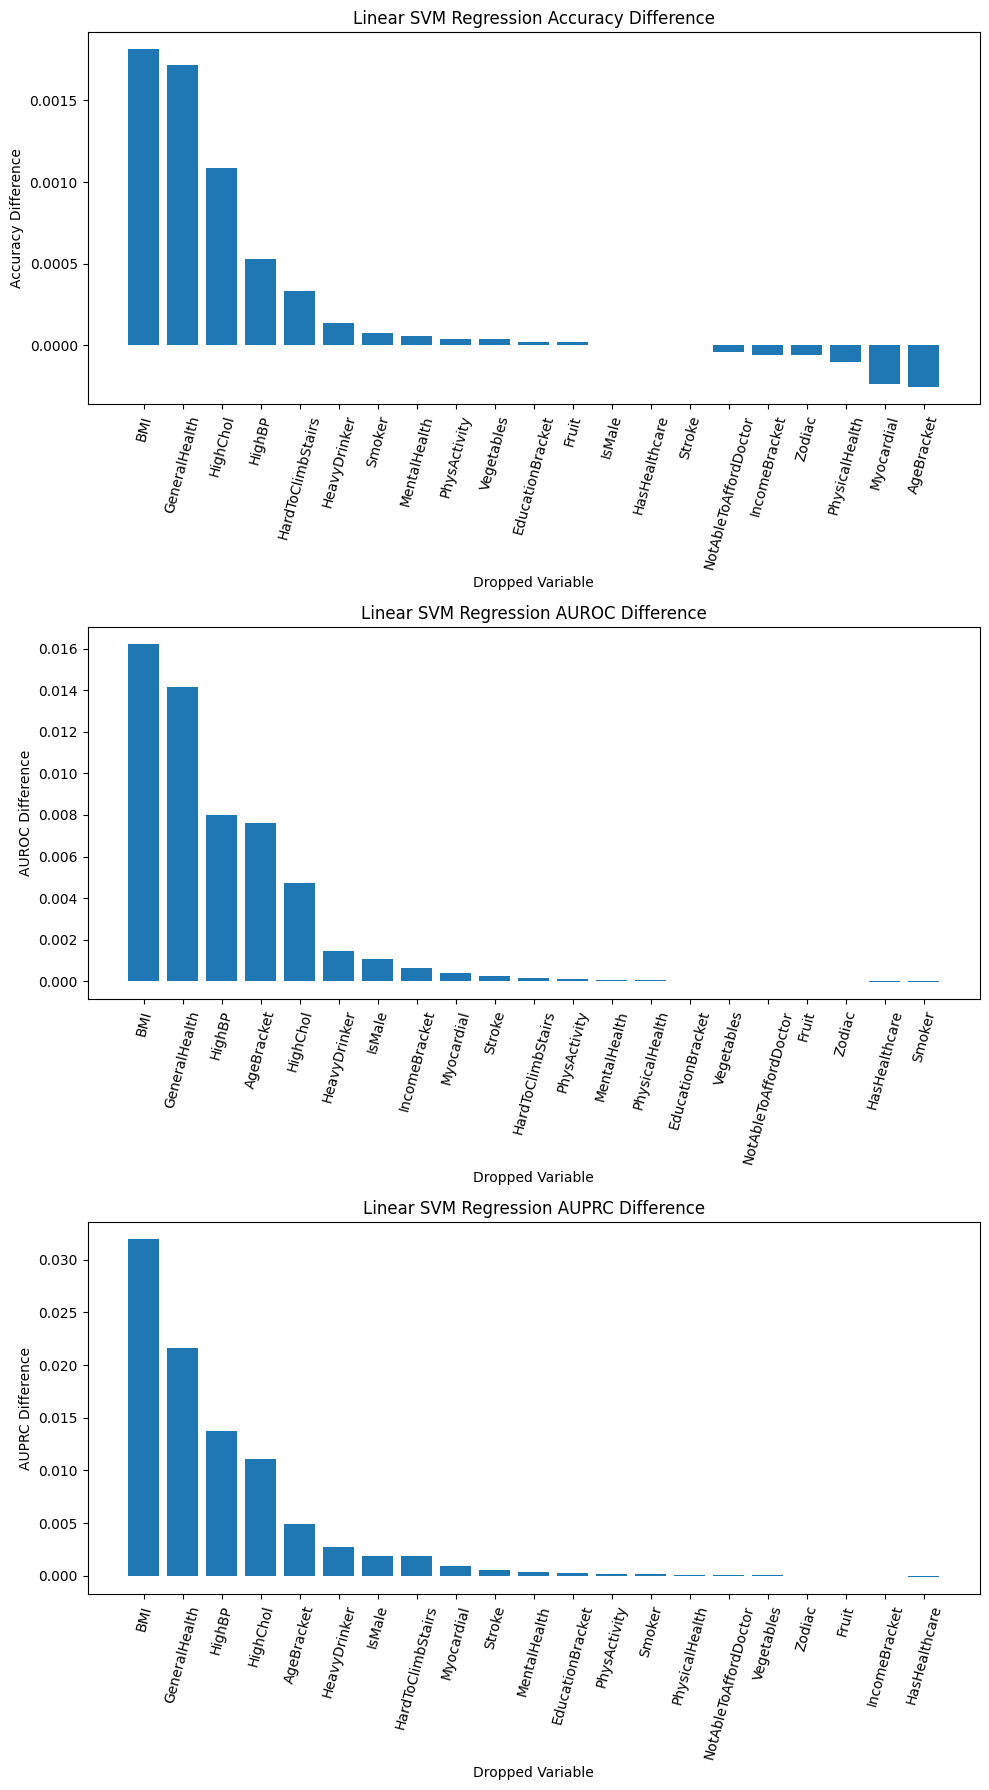

In [15]:
acc_svm_diffs = []
auroc_svm_diffs = []
auprc_svm_diffs = []

for column in X:
    df_temp = X.drop(column, axis=1)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp, y, test_size=0.2, random_state=3959)
    svm_temp = LinearSVC(C=1, dual=False)
    svm_temp.fit(X_train_temp, y_train_temp)
    y_pred_svm_temp = svm_temp.predict(X_test_temp)
    acc_svm_temp = accuracy_score(y_test_temp, y_pred_svm_temp)
    acc_svm_diff = acc_svm - acc_svm_temp
    acc_svm_diffs.append(acc_svm_diff)
    y_prob_svm_temp = svm_temp.decision_function(X_test_temp)
    auroc_svm_temp = roc_auc_score(y_test_temp, y_prob_svm_temp)
    auroc_svm_diff = auroc_svm - auroc_svm_temp
    auroc_svm_diffs.append(auroc_svm_diff)
    precision_svm_temp, recall_svm_temp, _ = precision_recall_curve(y_test_temp, y_prob_svm_temp)
    auprc_svm_temp = auc(recall_svm_temp, precision_svm_temp)
    auprc_svm_diff = auprc_svm - auprc_svm_temp
    auprc_svm_diffs.append(auprc_svm_diff)

diff_comparison_df = pd.DataFrame({'Dropped_Variable': var_names, 
                                   'Linear_SVM_Accuracy_Difference': acc_svm_diffs, 
                                   'Linear_SVM_AUROC_Difference': auroc_svm_diffs, 
                                   'Linear_SVM_AUPRC_Difference': auprc_svm_diffs})

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sorted_svm_acc_diffs = diff_comparison_df.sort_values(by='Linear_SVM_Accuracy_Difference', ascending=False)
sorted_svm_auroc_diffs = diff_comparison_df.sort_values(by='Linear_SVM_AUROC_Difference', ascending=False)
sorted_svm_auprc_diffs = diff_comparison_df.sort_values(by='Linear_SVM_AUPRC_Difference', ascending=False)

axes[0].bar(sorted_svm_acc_diffs['Dropped_Variable'], sorted_svm_acc_diffs['Linear_SVM_Accuracy_Difference'])
axes[0].set_xlabel('Dropped Variable')
axes[0].set_ylabel('Accuracy Difference')
axes[0].set_title('Linear SVM Regression Accuracy Difference')
axes[0].tick_params(axis='x', rotation=75)

axes[1].bar(sorted_svm_auroc_diffs['Dropped_Variable'], sorted_svm_auroc_diffs['Linear_SVM_AUROC_Difference'])
axes[1].set_xlabel('Dropped Variable')
axes[1].set_ylabel('AUROC Difference')
axes[1].set_title('Linear SVM Regression AUROC Difference')
axes[1].tick_params(axis='x', rotation=75)

axes[2].bar(sorted_svm_auprc_diffs['Dropped_Variable'], sorted_svm_auprc_diffs['Linear_SVM_AUPRC_Difference'])
axes[2].set_xlabel('Dropped Variable')
axes[2].set_ylabel('AUPRC Difference')
axes[2].set_title('Linear SVM Regression AUPRC Difference')
axes[2].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Question 3

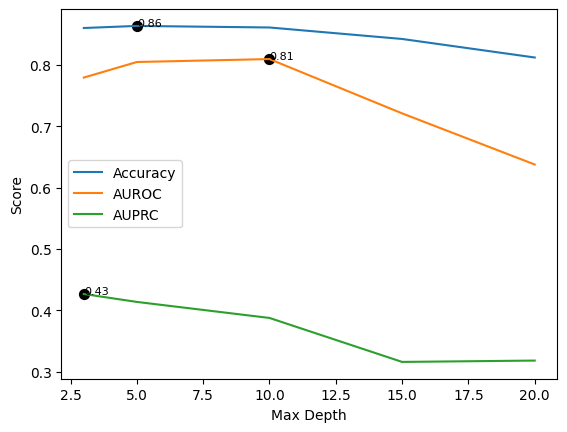

In [16]:
accs = []
aurocs = []
auprcs = []
max_points = {}
max_depths = [3,5,10,15,20]

for i in max_depths:
    sdt = tree.DecisionTreeClassifier(criterion='gini', random_state=3959, max_depth=i)
    sdt.fit(X_train, y_train)
    y_pred = sdt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = sdt.predict_proba(X_test)[:,1]
    auroc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    
    accs.append(acc)
    aurocs.append(auroc)
    auprcs.append(auprc)
    
    max_points['Accuracy'] = max(max_points.get('Accuracy', 0), acc)
    max_points['AUROC'] = max(max_points.get('AUROC', 0), auroc)
    max_points['AUPRC'] = max(max_points.get('AUPRC', 0), auprc)

plt.plot(max_depths, accs, label='Accuracy')
plt.plot(max_depths, aurocs, label='AUROC')
plt.plot(max_depths, auprcs, label='AUPRC')

for score, value in max_points.items():
    if score == 'Accuracy':
        idx = accs.index(value)
    elif score == 'AUROC':
        idx = aurocs.index(value)
    elif score == 'AUPRC':
        idx = auprcs.index(value)
    plt.scatter(max_depths[idx], value, color='black', marker='o', s=50)
    plt.text(max_depths[idx], value, f'{value:.2f}', fontsize=8)

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

In [17]:
sdt = tree.DecisionTreeClassifier(criterion='gini', random_state=3959, max_depth=10)
sdt.fit(X_train, y_train)
y_pred_sdt = sdt.predict(X_test)
acc_sdt = accuracy_score(y_test, y_pred_sdt)
print('Single Decision Tree Accuracy: %.2f' % acc_sdt)
y_prob_sdt = sdt.predict_proba(X_test)[:,1]
auroc_sdt = roc_auc_score(y_test, y_prob_sdt)
print('Single Decision Tree AUROC: %.2f' % auroc_sdt)
precision_sdt, recall_sdt, _ = precision_recall_curve(y_test, y_prob_sdt)
auprc_sdt = auc(recall_sdt, precision_sdt)
print('Single Decision Tree AUPRC: %.2f' % auprc_sdt)

Single Decision Tree Accuracy: 0.86
Single Decision Tree AUROC: 0.81
Single Decision Tree AUPRC: 0.39


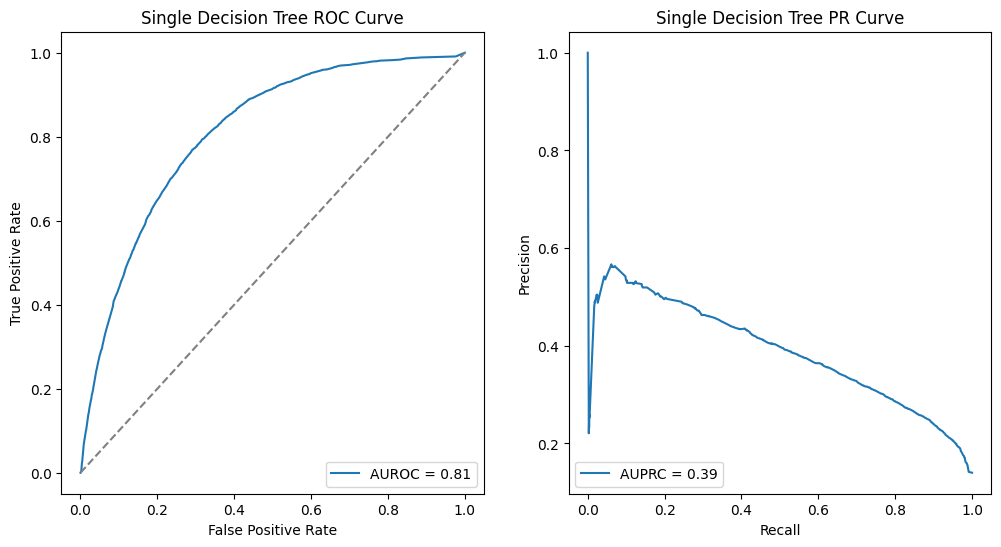

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

fpr_sdt, tpr_sdt, _ = roc_curve(y_test, y_prob_sdt)
axes[0].plot(fpr_sdt, tpr_sdt, label=f'AUROC = {auroc_sdt:.2f}')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Single Decision Tree ROC Curve')
axes[0].plot([0, 1], [0, 1], '--', color='gray')
axes[0].legend(loc='lower right')

axes[1].plot(recall_sdt, precision_sdt, label=f'AUPRC = {auprc_sdt:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Single Decision Tree PR Curve')
axes[1].legend(loc='lower left')

plt.show()

In [19]:
sdt_importance = sdt.feature_importances_
var_comparison_df['SDT_Importance'] = sdt_importance
var_comparison_df.head()

,Variable,Logistic_Coefficient,SVM_Coefficient,SDT_Importance
0,HighBP,0.191410,0.085066,0.323197
1,HighChol,0.146992,0.072320,0.065062
2,BMI,0.199271,0.113552,0.151095
3,Smoker,-0.004317,-0.005369,0.001994
4,Stroke,0.012380,0.012218,0.003618


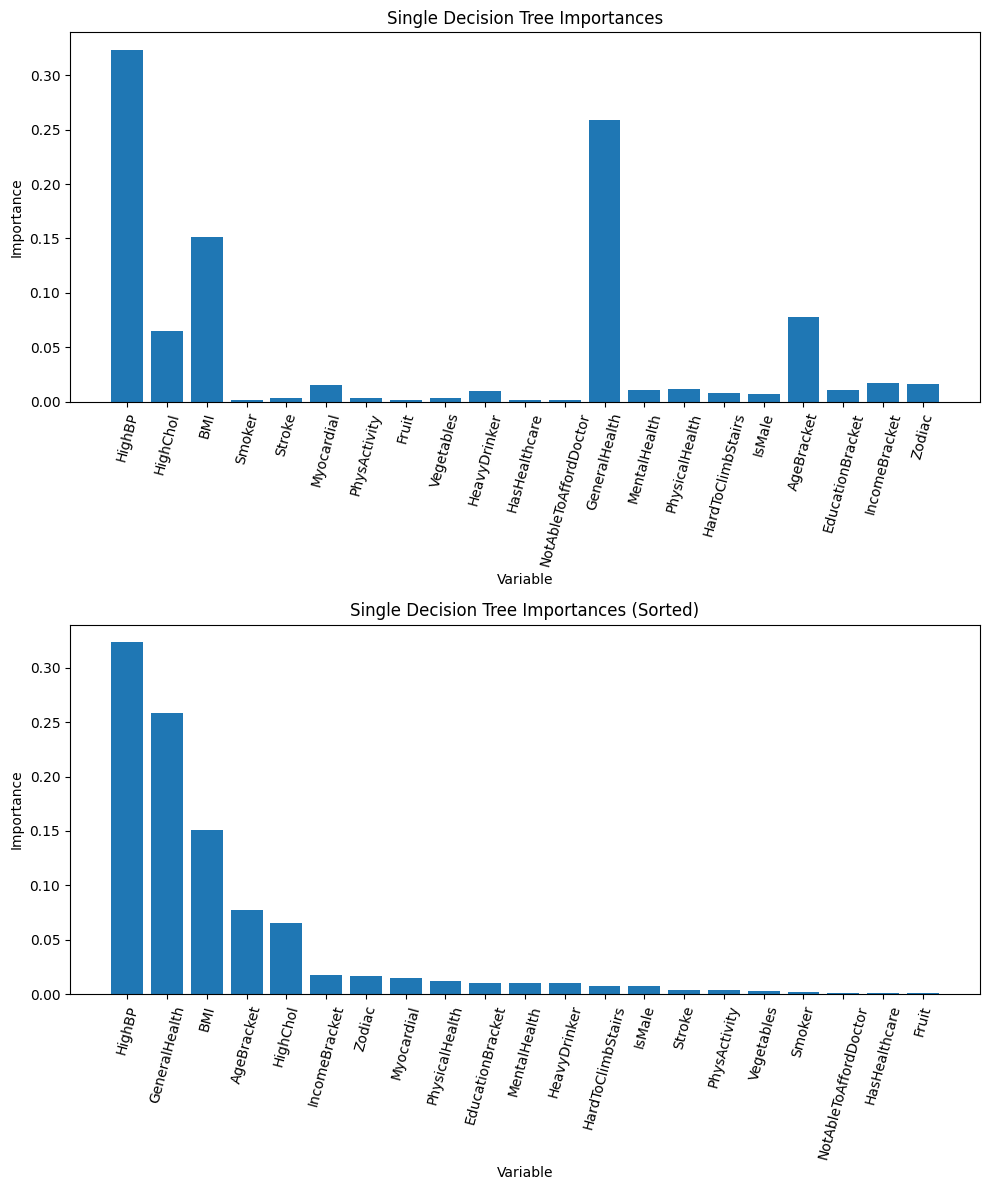

In [20]:
# Plot the feature importances
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.flatten()

axes[0].bar(var_comparison_df['Variable'], var_comparison_df['SDT_Importance'])
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Importance')
axes[0].set_title('Single Decision Tree Importances')
axes[0].tick_params(axis='x', rotation=75)

# Sort from high to low
sorted_sdt_imp = var_comparison_df.sort_values(by='SDT_Importance', ascending=False)
axes[1].bar(sorted_sdt_imp['Variable'], sorted_sdt_imp['SDT_Importance'])
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Importance')
axes[1].set_title('Single Decision Tree Importances (Sorted)')
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

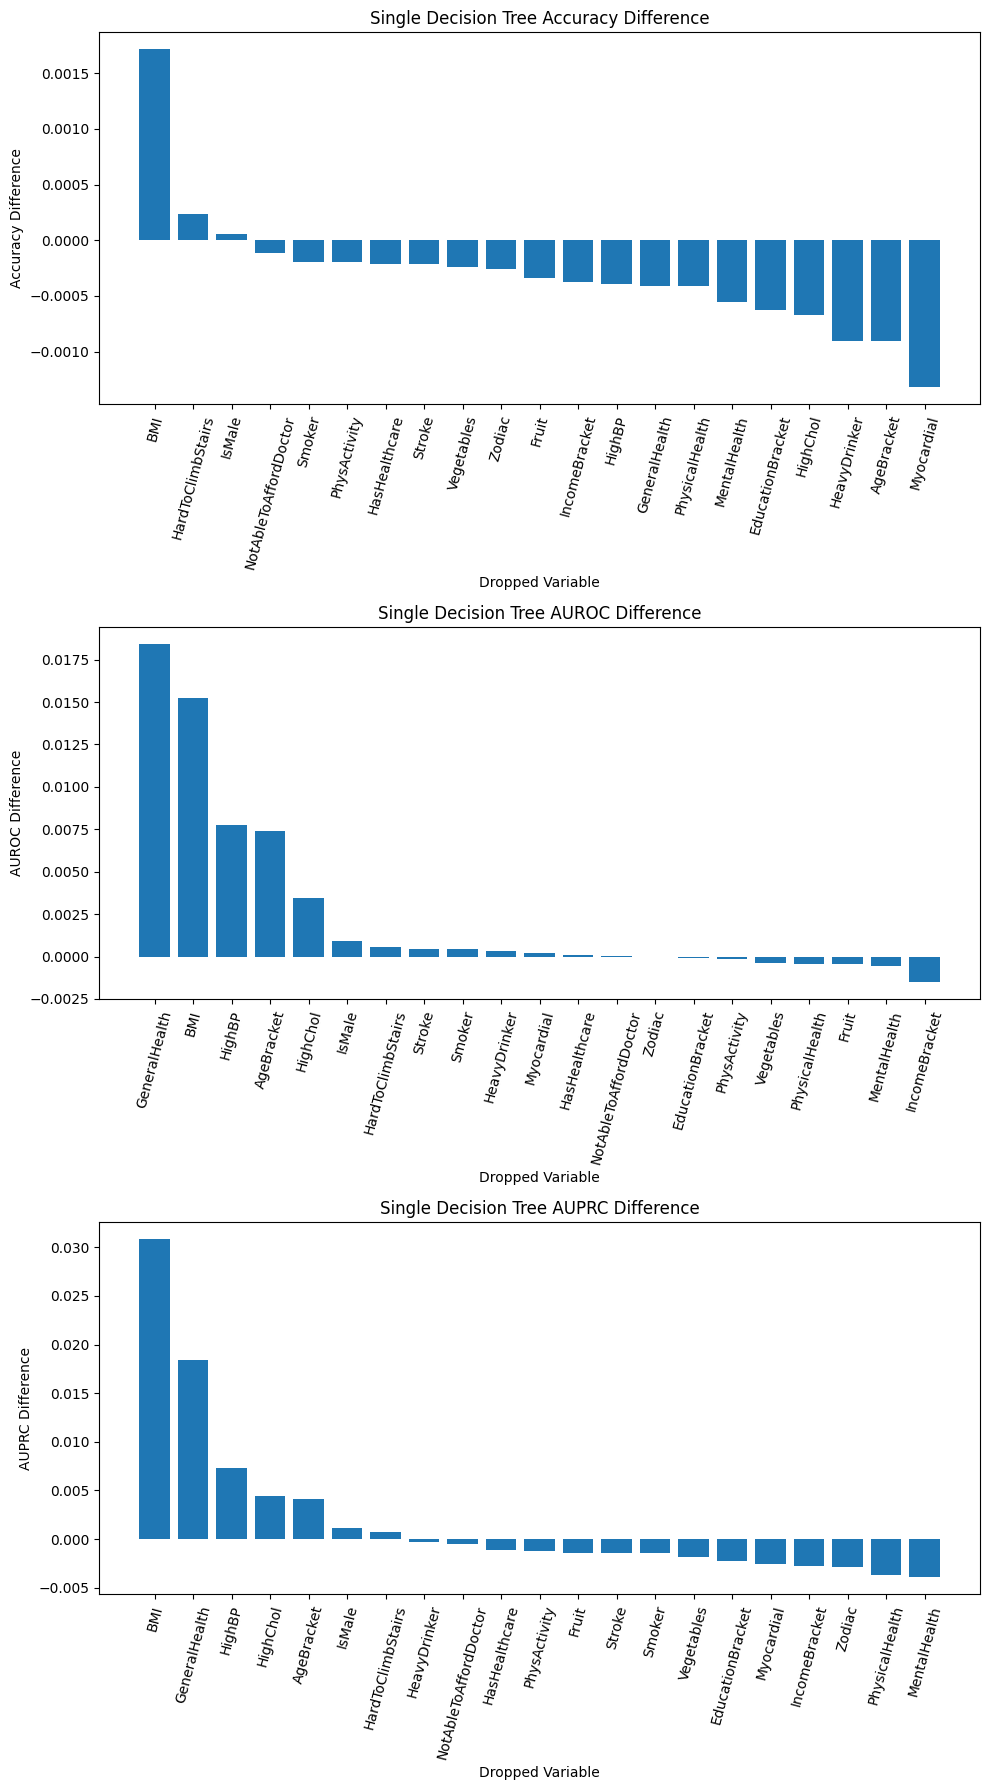

In [21]:
acc_sdt_diffs = []
auroc_sdt_diffs = []
auprc_sdt_diffs = []

for column in X:
    df_temp = X.drop(column, axis=1)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp, y, test_size=0.2, random_state=3959)
    sdt_temp = tree.DecisionTreeClassifier(criterion='gini', random_state=3959, max_depth=10)
    sdt_temp.fit(X_train_temp, y_train_temp)
    y_pred_sdt_temp = sdt_temp.predict(X_test_temp)
    acc_sdt_temp = accuracy_score(y_test_temp, y_pred_sdt_temp)
    acc_sdt_diff = acc_sdt - acc_sdt_temp
    acc_sdt_diffs.append(acc_sdt_diff)
    y_prob_sdt_temp = sdt_temp.predict_proba(X_test_temp)[:,1]
    auroc_sdt_temp = roc_auc_score(y_test_temp, y_prob_sdt_temp)
    auroc_sdt_diff = auroc_sdt - auroc_sdt_temp
    auroc_sdt_diffs.append(auroc_sdt_diff)
    precision_sdt_temp, recall_sdt_temp, _ = precision_recall_curve(y_test_temp, y_prob_sdt_temp)
    auprc_sdt_temp = auc(recall_sdt_temp, precision_sdt_temp)
    auprc_sdt_diff = auprc_sdt - auprc_sdt_temp
    auprc_sdt_diffs.append(auprc_sdt_diff)

diff_comparison_df = pd.DataFrame({'Dropped_Variable': var_names, 
                                   'SDT_Accuracy_Difference': acc_sdt_diffs, 
                                   'SDT_AUROC_Difference': auroc_sdt_diffs, 
                                   'SDT_AUPRC_Difference': auprc_sdt_diffs})

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sorted_sdt_acc_diffs = diff_comparison_df.sort_values(by='SDT_Accuracy_Difference', ascending=False)
sorted_sdt_auroc_diffs = diff_comparison_df.sort_values(by='SDT_AUROC_Difference', ascending=False)
sorted_sdt_auprc_diffs = diff_comparison_df.sort_values(by='SDT_AUPRC_Difference', ascending=False)

axes[0].bar(sorted_sdt_acc_diffs['Dropped_Variable'], sorted_sdt_acc_diffs['SDT_Accuracy_Difference'])
axes[0].set_xlabel('Dropped Variable')
axes[0].set_ylabel('Accuracy Difference')
axes[0].set_title('Single Decision Tree Accuracy Difference')
axes[0].tick_params(axis='x', rotation=75)

axes[1].bar(sorted_sdt_auroc_diffs['Dropped_Variable'], sorted_sdt_auroc_diffs['SDT_AUROC_Difference'])
axes[1].set_xlabel('Dropped Variable')
axes[1].set_ylabel('AUROC Difference')
axes[1].set_title('Single Decision Tree AUROC Difference')
axes[1].tick_params(axis='x', rotation=75)

axes[2].bar(sorted_sdt_auprc_diffs['Dropped_Variable'], sorted_sdt_auprc_diffs['SDT_AUPRC_Difference'])
axes[2].set_xlabel('Dropped Variable')
axes[2].set_ylabel('AUPRC Difference')
axes[2].set_title('Single Decision Tree AUPRC Difference')
axes[2].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Question 4

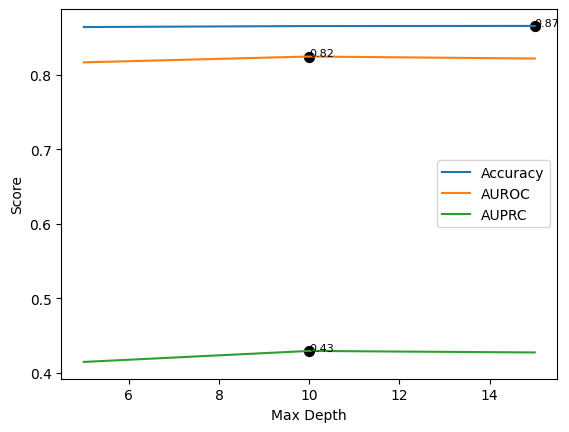

In [22]:
accs = []
aurocs = []
auprcs = []
max_points = {}
max_depths = [5,10,15]

for i in max_depths:
    rfc = RandomForestClassifier(n_estimators=1000, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini', random_state=3959, max_depth=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = rfc.predict_proba(X_test)[:,1]
    auroc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    
    accs.append(acc)
    aurocs.append(auroc)
    auprcs.append(auprc)
    
    max_points['Accuracy'] = max(max_points.get('Accuracy', 0), acc)
    max_points['AUROC'] = max(max_points.get('AUROC', 0), auroc)
    max_points['AUPRC'] = max(max_points.get('AUPRC', 0), auprc)

plt.plot(max_depths, accs, label='Accuracy')
plt.plot(max_depths, aurocs, label='AUROC')
plt.plot(max_depths, auprcs, label='AUPRC')

for score, value in max_points.items():
    if score == 'Accuracy':
        idx = accs.index(value)
    elif score == 'AUROC':
        idx = aurocs.index(value)
    elif score == 'AUPRC':
        idx = auprcs.index(value)
    plt.scatter(max_depths[idx], value, color='black', marker='o', s=50)
    plt.text(max_depths[idx], value, f'{value:.2f}', fontsize=8)

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

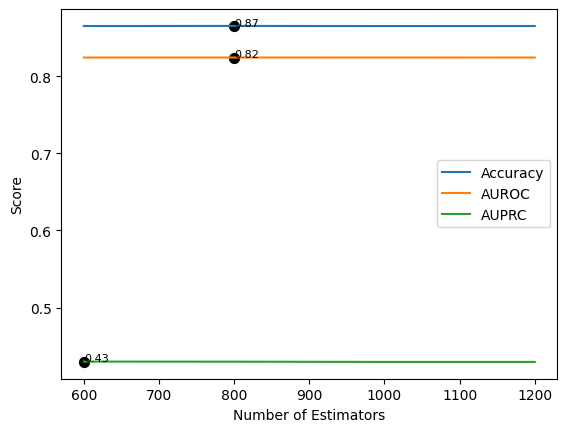

In [23]:
accs = []
aurocs = []
auprcs = []
max_points = {}
n_estimators_range = [600,800,1000,1200]

for i in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=i, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini', random_state=3959, max_depth=10)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = rfc.predict_proba(X_test)[:,1]
    auroc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    
    accs.append(acc)
    aurocs.append(auroc)
    auprcs.append(auprc)
    
    max_points['Accuracy'] = max(max_points.get('Accuracy', 0), acc)
    max_points['AUROC'] = max(max_points.get('AUROC', 0), auroc)
    max_points['AUPRC'] = max(max_points.get('AUPRC', 0), auprc)

plt.plot(n_estimators_range, accs, label='Accuracy')
plt.plot(n_estimators_range, aurocs, label='AUROC')
plt.plot(n_estimators_range, auprcs, label='AUPRC')

for score, value in max_points.items():
    if score == 'Accuracy':
        idx = accs.index(value)
    elif score == 'AUROC':
        idx = aurocs.index(value)
    elif score == 'AUPRC':
        idx = auprcs.index(value)
    plt.scatter(n_estimators_range[idx], value, color='black', marker='o', s=50)
    plt.text(n_estimators_range[idx], value, f'{value:.2f}', fontsize=8)

plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.show()

In [24]:
rfc = RandomForestClassifier(n_estimators=800, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini', random_state=3959, max_depth=10)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Accuracy: %.2f' % acc_rfc)
y_prob_rfc = rfc.predict_proba(X_test)[:,1]
auroc_rfc = roc_auc_score(y_test, y_prob_rfc)
print('Random Forest AUROC: %.2f' % auroc_rfc)
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_prob_rfc)
auprc_rfc = auc(recall_rfc, precision_rfc)
print('Random Forest AUPRC: %.2f' % auprc_rfc)

Random Forest Accuracy: 0.87
Random Forest AUROC: 0.82
Random Forest AUPRC: 0.43


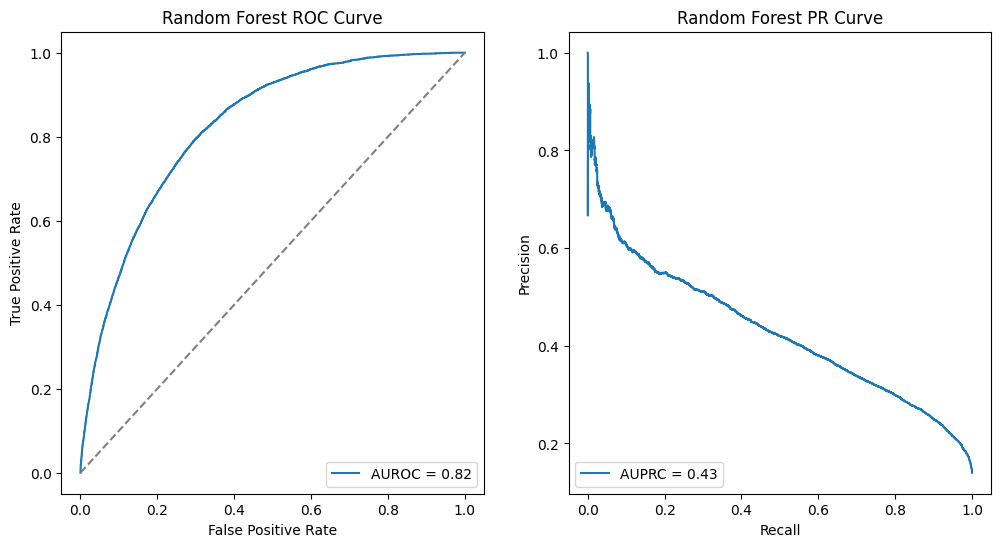

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
axes[0].plot(fpr_rfc, tpr_rfc, label=f'AUROC = {auroc_rfc:.2f}')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Random Forest ROC Curve')
axes[0].plot([0, 1], [0, 1], '--', color='gray')
axes[0].legend(loc='lower right')

axes[1].plot(recall_rfc, precision_rfc, label=f'AUPRC = {auprc_rfc:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Random Forest PR Curve')
axes[1].legend(loc='lower left')

plt.show()

In [26]:
rfc_importance = rfc.feature_importances_
var_comparison_df['RFC_Importance'] = rfc_importance
var_comparison_df.head()

,Variable,Logistic_Coefficient,SVM_Coefficient,SDT_Importance,RFC_Importance
0,HighBP,0.191410,0.085066,0.323197,0.146365
1,HighChol,0.146992,0.072320,0.065062,0.053321
2,BMI,0.199271,0.113552,0.151095,0.158889
3,Smoker,-0.004317,-0.005369,0.001994,0.012478
4,Stroke,0.012380,0.012218,0.003618,0.011123


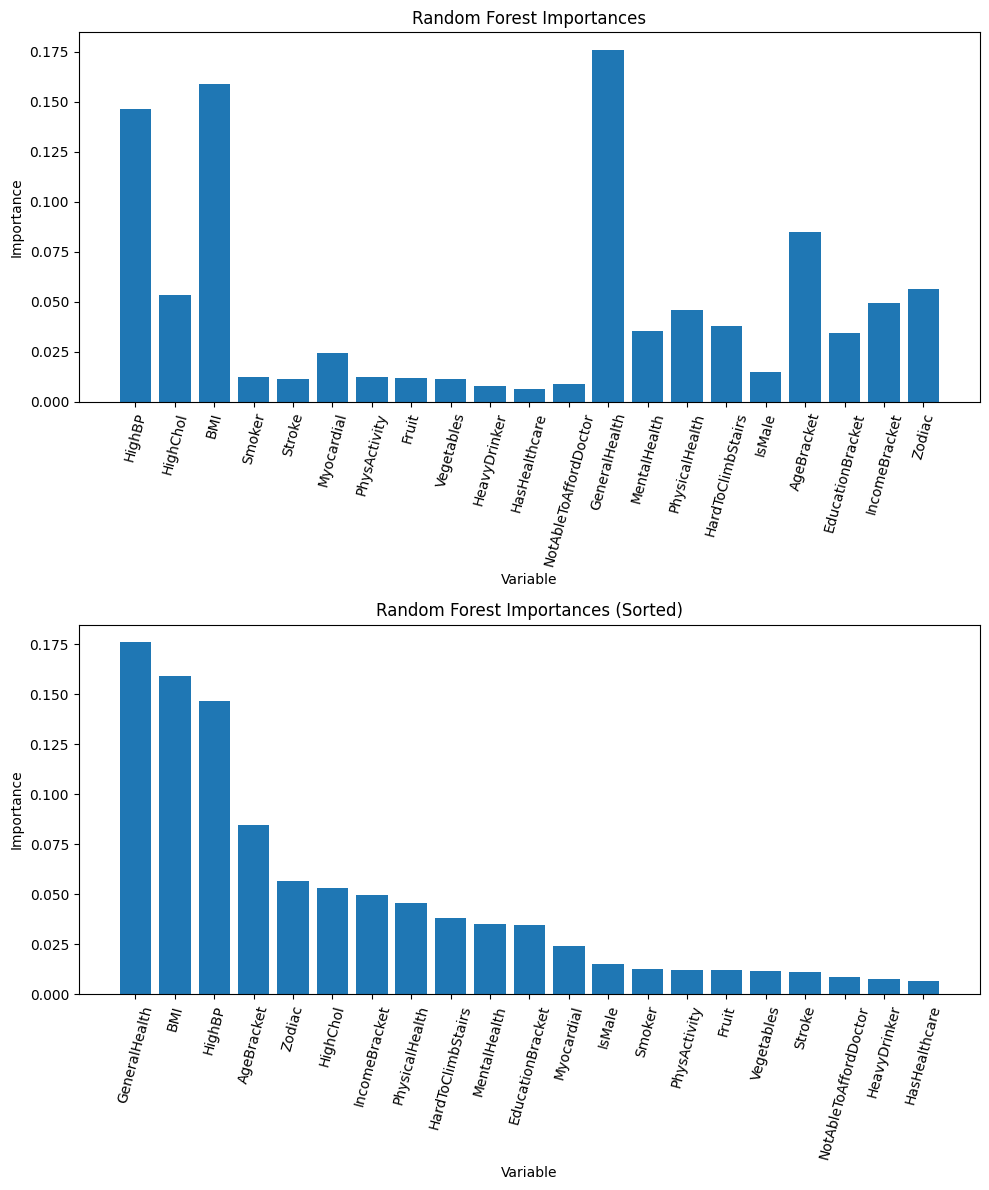

In [27]:
# Plot the feature importances
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.flatten()

axes[0].bar(var_comparison_df['Variable'], var_comparison_df['RFC_Importance'])
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Importance')
axes[0].set_title('Random Forest Importances')
axes[0].tick_params(axis='x', rotation=75)

# Sort from high to low
sorted_rfc_imp = var_comparison_df.sort_values(by='RFC_Importance', ascending=False)
axes[1].bar(sorted_rfc_imp['Variable'], sorted_rfc_imp['RFC_Importance'])
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Importance')
axes[1].set_title('Random Forest Importances (Sorted)')
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

In [ ]:
acc_rfc_diffs = []
auroc_rfc_diffs = []
auprc_rfc_diffs = []

for column in X:
    df_temp = X.drop(column, axis=1)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp, y, test_size=0.2, random_state=3959)
    rfc_temp = RandomForestClassifier(n_estimators=800, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini', random_state=3959, max_depth=10)
    rfc_temp.fit(X_train_temp, y_train_temp)
    y_pred_rfc_temp = rfc_temp.predict(X_test_temp)
    acc_rfc_temp = accuracy_score(y_test_temp, y_pred_rfc_temp)
    acc_rfc_diff = acc_rfc - acc_rfc_temp
    acc_rfc_diffs.append(acc_rfc_diff)
    y_prob_rfc_temp = rfc_temp.predict_proba(X_test_temp)[:,1]
    auroc_rfc_temp = roc_auc_score(y_test_temp, y_prob_rfc_temp)
    auroc_rfc_diff = auroc_rfc - auroc_rfc_temp
    auroc_rfc_diffs.append(auroc_rfc_diff)
    precision_rfc_temp, recall_rfc_temp, _ = precision_recall_curve(y_test_temp, y_prob_rfc_temp)
    auprc_rfc_temp = auc(recall_rfc_temp, precision_rfc_temp)
    auprc_rfc_diff = auprc_rfc - auprc_rfc_temp
    auprc_rfc_diffs.append(auprc_rfc_diff)

diff_comparison_df = pd.DataFrame({'Dropped_Variable': var_names, 
                                   'RFC_Accuracy_Difference': acc_rfc_diffs, 
                                   'RFC_AUROC_Difference': auroc_rfc_diffs, 
                                   'RFC_AUPRC_Difference': auprc_rfc_diffs})

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sorted_rfc_acc_diffs = diff_comparison_df.sort_values(by='RFC_Accuracy_Difference', ascending=False)
sorted_rfc_auroc_diffs = diff_comparison_df.sort_values(by='RFC_AUROC_Difference', ascending=False)
sorted_rfc_auprc_diffs = diff_comparison_df.sort_values(by='RFC_AUPRC_Difference', ascending=False)

axes[0].bar(sorted_rfc_acc_diffs['Dropped_Variable'], sorted_rfc_acc_diffs['RFC_Accuracy_Difference'])
axes[0].set_xlabel('Dropped Variable')
axes[0].set_ylabel('Accuracy Difference')
axes[0].set_title('Random Forest Accuracy Difference')
axes[0].tick_params(axis='x', rotation=75)

axes[1].bar(sorted_rfc_auroc_diffs['Dropped_Variable'], sorted_rfc_auroc_diffs['RFC_AUROC_Difference'])
axes[1].set_xlabel('Dropped Variable')
axes[1].set_ylabel('AUROC Difference')
axes[1].set_title('Random Forest AUROC Difference')
axes[1].tick_params(axis='x', rotation=75)

axes[2].bar(sorted_rfc_auprc_diffs['Dropped_Variable'], sorted_rfc_auprc_diffs['RFC_AUPRC_Difference'])
axes[2].set_xlabel('Dropped Variable')
axes[2].set_ylabel('AUPRC Difference')
axes[2].set_title('Random Forest AUPRC Difference')
axes[2].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Question 5

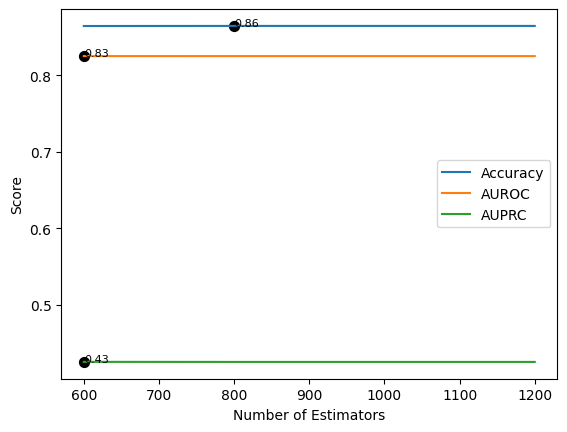

In [28]:
accs = []
aurocs = []
auprcs = []
max_points = {}
n_estimators_range = [600,800,1000,1200]

for i in n_estimators_range:
    adab = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=i, learning_rate=1)
    adab.fit(X_train, y_train)
    y_pred = adab.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = adab.predict_proba(X_test)[:,1]
    auroc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    
    accs.append(acc)
    aurocs.append(auroc)
    auprcs.append(auprc)
    
    max_points['Accuracy'] = max(max_points.get('Accuracy', 0), acc)
    max_points['AUROC'] = max(max_points.get('AUROC', 0), auroc)
    max_points['AUPRC'] = max(max_points.get('AUPRC', 0), auprc)

plt.plot(n_estimators_range, accs, label='Accuracy')
plt.plot(n_estimators_range, aurocs, label='AUROC')
plt.plot(n_estimators_range, auprcs, label='AUPRC')

for score, value in max_points.items():
    if score == 'Accuracy':
        idx = accs.index(value)
    elif score == 'AUROC':
        idx = aurocs.index(value)
    elif score == 'AUPRC':
        idx = auprcs.index(value)
    plt.scatter(n_estimators_range[idx], value, color='black', marker='o', s=50)
    plt.text(n_estimators_range[idx], value, f'{value:.2f}', fontsize=8)

plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.show()

In [29]:
adab = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=800, learning_rate=1)
adab.fit(X_train, y_train)
y_pred_adab = adab.predict(X_test)
acc_adab = accuracy_score(y_test, y_pred_adab)
print('AdaBoost Accuracy: %.2f' % acc_adab)
y_prob_adab = adab.predict_proba(X_test)[:,1]
auroc_adab = roc_auc_score(y_test, y_prob_adab)
print('AdaBoost AUROC: %.2f' % auroc_adab)
precision_adab, recall_adab, _ = precision_recall_curve(y_test, y_prob_adab)
auprc_adab = auc(recall_adab, precision_adab)
print('AdaBoost AUPRC: %.2f' % auprc_adab)

AdaBoost Accuracy: 0.86
AdaBoost AUROC: 0.83
AdaBoost AUPRC: 0.43


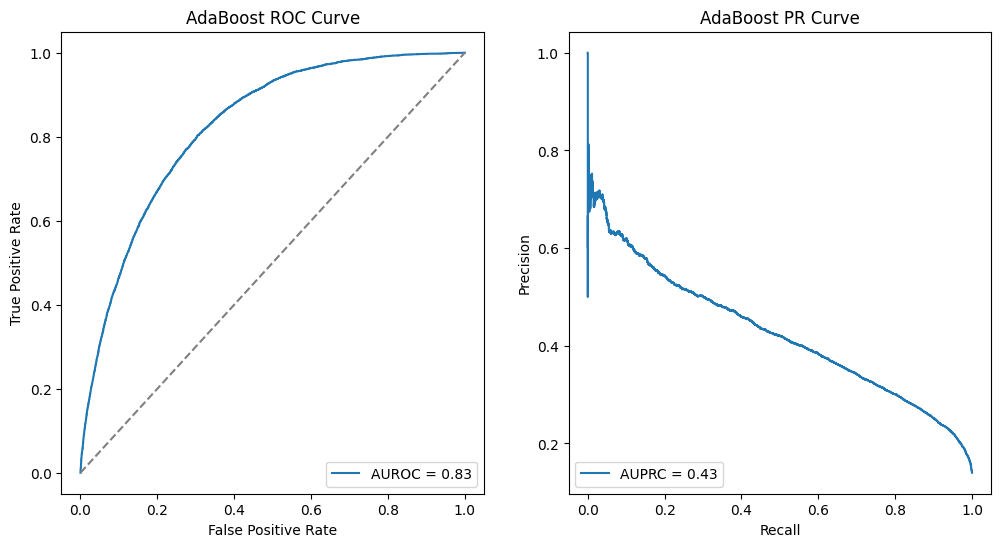

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

fpr_adab, tpr_adab, _ = roc_curve(y_test, y_prob_adab)
axes[0].plot(fpr_adab, tpr_adab, label=f'AUROC = {auroc_adab:.2f}')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('AdaBoost ROC Curve')
axes[0].plot([0, 1], [0, 1], '--', color='gray')
axes[0].legend(loc='lower right')

axes[1].plot(recall_adab, precision_adab, label=f'AUPRC = {auprc_adab:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('AdaBoost PR Curve')
axes[1].legend(loc='lower left')

plt.show()

In [31]:
adab_importance = adab.feature_importances_
var_comparison_df['AdaB_Importance'] = adab_importance
var_comparison_df.head()

,Variable,Logistic_Coefficient,SVM_Coefficient,SDT_Importance,RFC_Importance,AdaB_Importance
0,HighBP,0.191410,0.085066,0.323197,0.146365,0.265772
1,HighChol,0.146992,0.072320,0.065062,0.053321,0.024221
2,BMI,0.199271,0.113552,0.151095,0.158889,0.233751
3,Smoker,-0.004317,-0.005369,0.001994,0.012478,0.000592
4,Stroke,0.012380,0.012218,0.003618,0.011123,0.006638


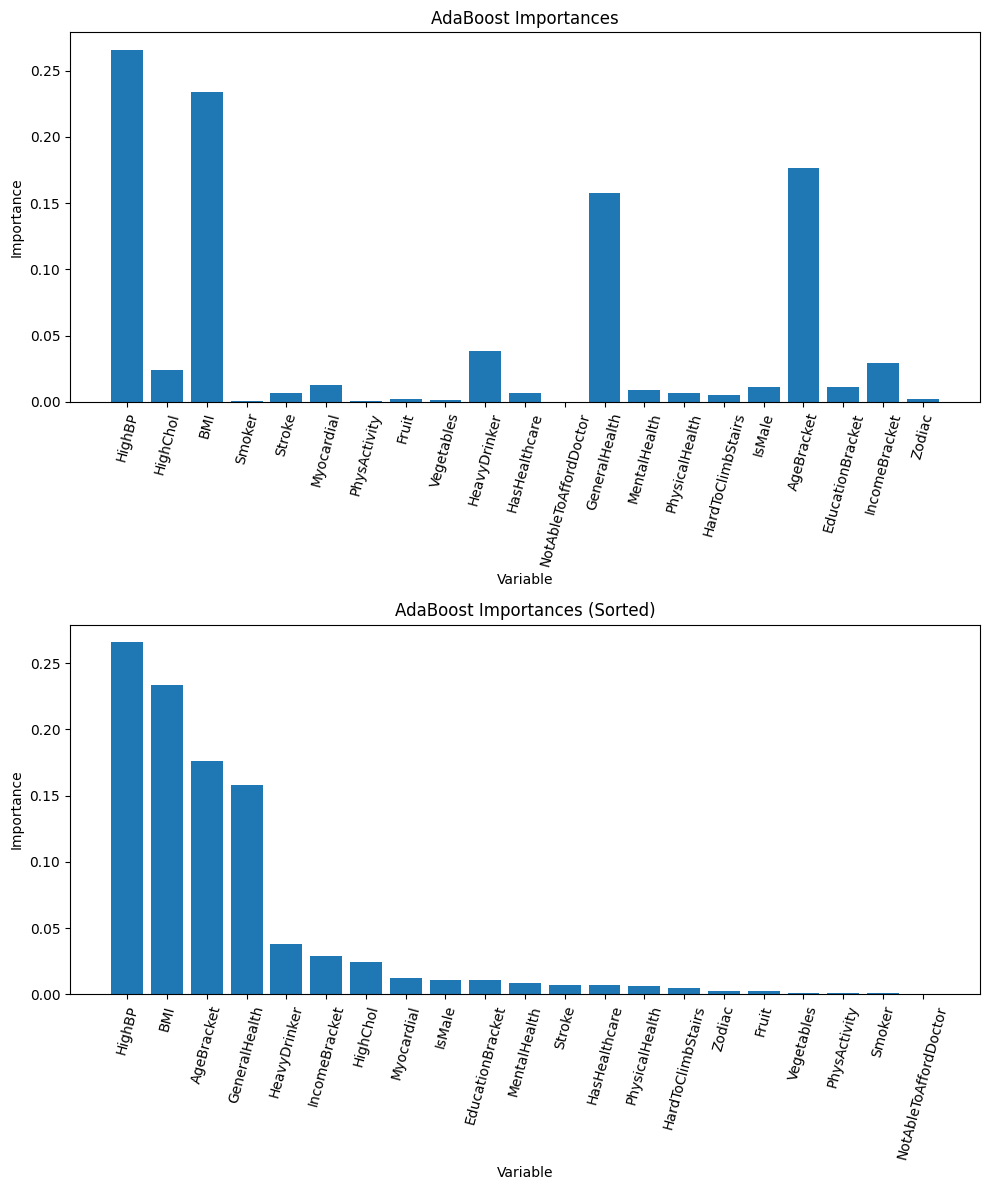

In [32]:
# Plot the feature importances
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.flatten()

axes[0].bar(var_comparison_df['Variable'], var_comparison_df['AdaB_Importance'])
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Importance')
axes[0].set_title('AdaBoost Importances')
axes[0].tick_params(axis='x', rotation=75)

# Sort from high to low
sorted_adab_imp = var_comparison_df.sort_values(by='AdaB_Importance', ascending=False)
axes[1].bar(sorted_adab_imp['Variable'], sorted_adab_imp['AdaB_Importance'])
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Importance')
axes[1].set_title('AdaBoost Importances (Sorted)')
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

In [ ]:
acc_adab_diffs = []
auroc_adab_diffs = []
auprc_adab_diffs = []

for column in X:
    df_temp = X.drop(column, axis=1)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp, y, test_size=0.2, random_state=3959)
    adab_temp = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=800, learning_rate=1)
    adab_temp.fit(X_train_temp, y_train_temp)
    y_pred_adab_temp = adab_temp.predict(X_test_temp)
    acc_adab_temp = accuracy_score(y_test_temp, y_pred_adab_temp)
    acc_adab_diff = acc_adab - acc_adab_temp
    acc_adab_diffs.append(acc_adab_diff)
    y_prob_adab_temp = adab_temp.predict_proba(X_test_temp)[:,1]
    auroc_adab_temp = roc_auc_score(y_test_temp, y_prob_adab_temp)
    auroc_adab_diff = auroc_adab - auroc_adab_temp
    auroc_adab_diffs.append(auroc_adab_diff)
    precision_adab_temp, recall_adab_temp, _ = precision_recall_curve(y_test_temp, y_prob_adab_temp)
    auprc_adab_temp = auc(recall_adab_temp, precision_adab_temp)
    auprc_adab_diff = auprc_adab - auprc_adab_temp
    auprc_adab_diffs.append(auprc_adab_diff)

diff_comparison_df = pd.DataFrame({'Dropped_Variable': var_names, 
                                   'AdaB_Accuracy_Difference': acc_adab_diffs, 
                                   'AdaB_AUROC_Difference': auroc_adab_diffs, 
                                   'AdaB_AUPRC_Difference': auprc_adab_diffs})

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sorted_adab_acc_diffs = diff_comparison_df.sort_values(by='AdaB_Accuracy_Difference', ascending=False)
sorted_adab_auroc_diffs = diff_comparison_df.sort_values(by='AdaB_AUROC_Difference', ascending=False)
sorted_adab_auprc_diffs = diff_comparison_df.sort_values(by='AdaB_AUPRC_Difference', ascending=False)

axes[0].bar(sorted_adab_acc_diffs['Dropped_Variable'], sorted_adab_acc_diffs['AdaB_Accuracy_Difference'])
axes[0].set_xlabel('Dropped Variable')
axes[0].set_ylabel('Accuracy Difference')
axes[0].set_title('AdaBoost Accuracy Difference')
axes[0].tick_params(axis='x', rotation=75)

axes[1].bar(sorted_adab_auroc_diffs['Dropped_Variable'], sorted_adab_auroc_diffs['AdaB_AUROC_Difference'])
axes[1].set_xlabel('Dropped Variable')
axes[1].set_ylabel('AUROC Difference')
axes[1].set_title('AdaBoost AUROC Difference')
axes[1].tick_params(axis='x', rotation=75)

axes[2].bar(sorted_adab_auprc_diffs['Dropped_Variable'], sorted_adab_auprc_diffs['AdaB_AUPRC_Difference'])
axes[2].set_xlabel('Dropped Variable')
axes[2].set_ylabel('AUPRC Difference')
axes[2].set_title('AdaBoost AUPRC Difference')
axes[2].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Extra Credit a

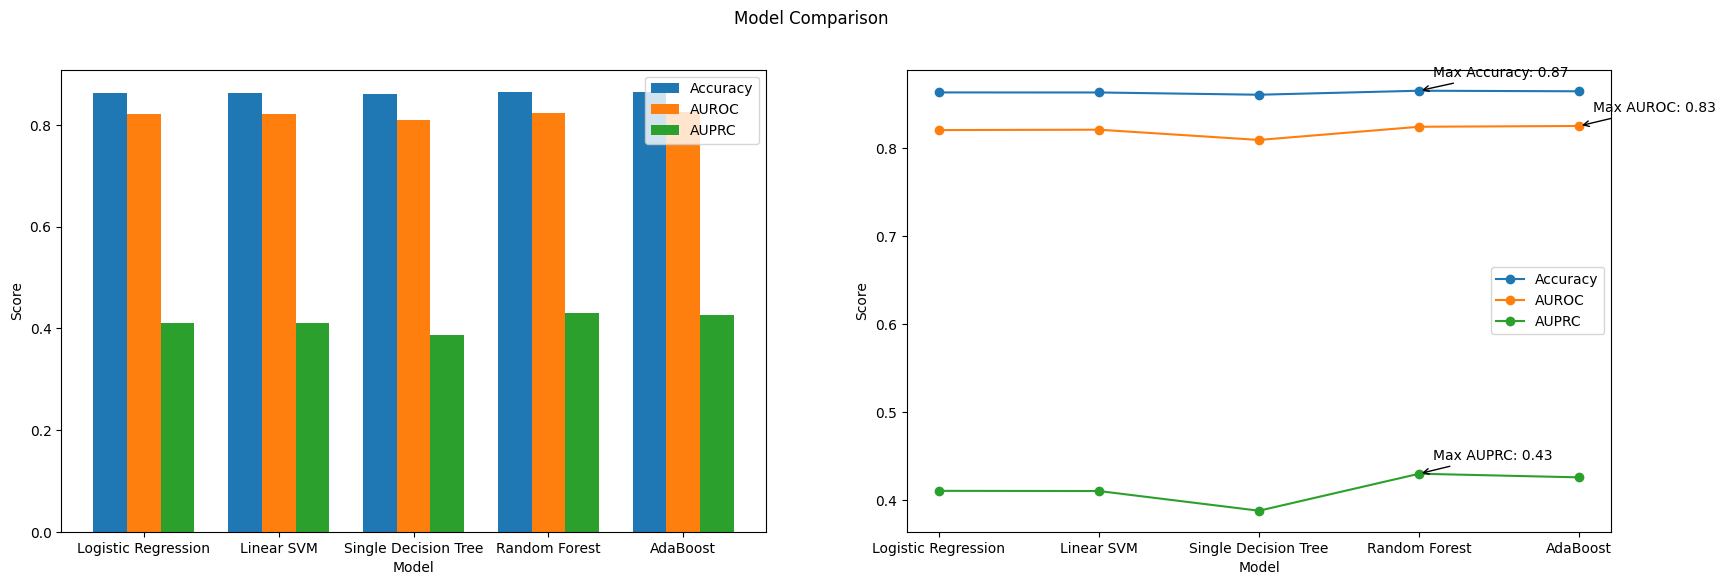

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Model Comparison')
axes = axes.flatten()

# Plot a histogram to show accuracy, auroc, auprc for each model
# Each column has three subcolumns: accuracy, auroc, auprc
acc_comp = [acc_log, acc_svm, acc_sdt, acc_rfc, acc_adab]
auroc_comp = [auroc_log, auroc_svm, auroc_sdt, auroc_rfc, auroc_adab]
auprc_comp = [auprc_log, auprc_svm, auprc_sdt, auprc_rfc, auprc_adab]
models = ['Logistic Regression', 'Linear SVM', 'Single Decision Tree', 'Random Forest', 'AdaBoost']
x = range(len(models))
bar_width = 0.25
axes[0].bar(x, acc_comp, bar_width, label='Accuracy')
axes[0].bar([i + bar_width for i in x], auroc_comp, bar_width, label='AUROC')
axes[0].bar([i + bar_width*2 for i in x], auprc_comp, bar_width, label='AUPRC')
axes[0].set_xticks([i + bar_width for i in x])
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')

# Plot a line graph
# Each line represents a score for each model
axes[1].plot(models, acc_comp, label='Accuracy', marker='o')
axes[1].plot(models, auroc_comp, label='AUROC', marker='o')
axes[1].plot(models, auprc_comp, label='AUPRC', marker='o')
axes[1].legend()
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')


# Marking maximum points
for score_list, label in zip([acc_comp, auroc_comp, auprc_comp], ['Accuracy', 'AUROC', 'AUPRC']):
    max_score = max(score_list)
    max_index = score_list.index(max_score)
    axes[1].annotate(f'Max {label}: {max_score:.2f}', xy=(models[max_index], max_score),
                     xytext=(10, 10), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.show()

In [35]:
print('Logistic Regression', acc_log, auroc_log, auprc_log)
print('Linear SVM', acc_svm, auroc_svm, auprc_svm)
print('Single Decision Tree', acc_sdt, auroc_sdt, auprc_sdt)
print('Random Forest', acc_log, auroc_log, auprc_log)
print('AdaBosot', acc_adab, auroc_adab, auprc_adab)

Logistic Regression 0.8633317565436771 0.8205423571267421 0.4102937186867374
Linear SVM 0.8632923368022706 0.8209677766706818 0.41009081645753576
Single Decision Tree 0.8607300536108483 0.8092992971906778 0.38770225021556126
Random Forest 0.8633317565436771 0.8205423571267421 0.4102937186867374
AdaBosot 0.8646326080100915 0.8251925860286802 0.4256384523679617


# Extra Credit b

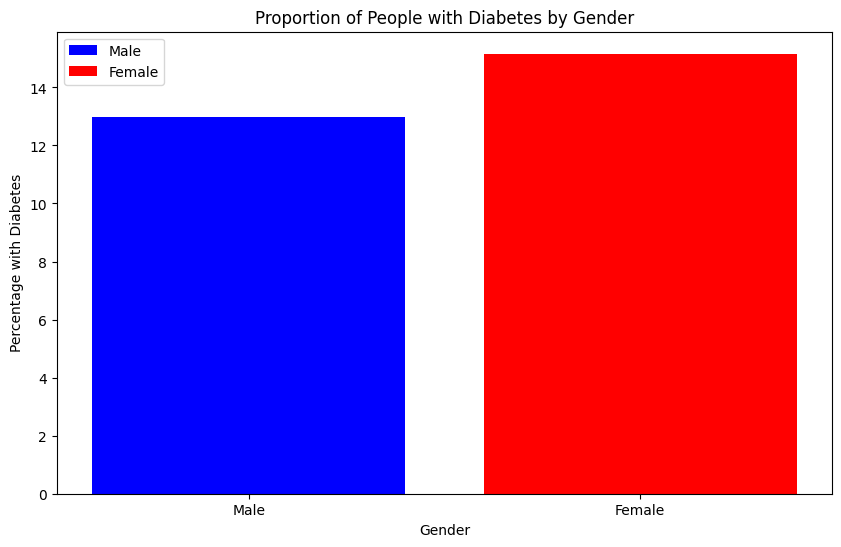

In [36]:
# Calculate proportions of people with diabetes by gender
diabetes_counts = df_original.groupby('BiologicalSex')['Diabetes'].value_counts(normalize=True).unstack()

# Plot the histogram
plt.figure(figsize=(10, 6))

# Plotting male data
plt.bar(0, diabetes_counts.loc[1, 1] * 100, color='blue', label='Male')

# Plotting female data
plt.bar(1, diabetes_counts.loc[2, 1] * 100, color='red', label='Female')

# Adding labels and title
plt.title('Proportion of People with Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage with Diabetes')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend()

# Show plot
plt.show()

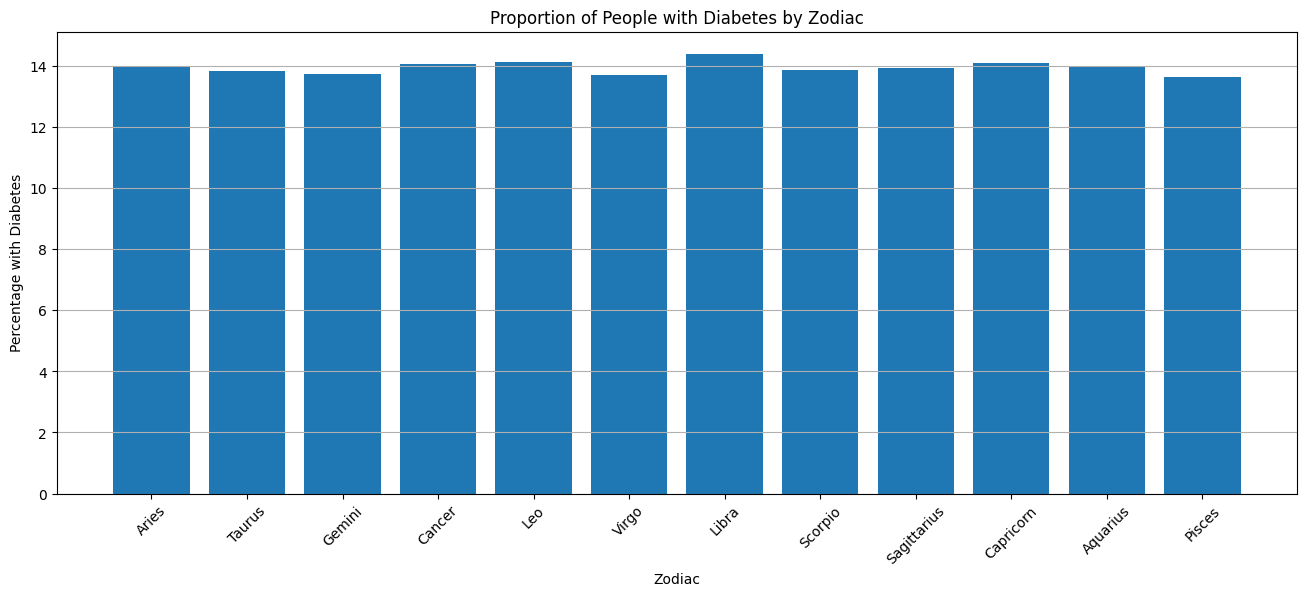

In [37]:
# Calculate proportions of people with diabetes by zodiac
diabetes_counts = df_original.groupby('Zodiac')['Diabetes'].value_counts(normalize=True).unstack()

# Rename to match the respective zodiac signs
zodiac_signs = {
    1: 'Aries',
    2: 'Taurus',
    3: 'Gemini',
    4: 'Cancer',
    5: 'Leo',
    6: 'Virgo',
    7: 'Libra',
    8: 'Scorpio',
    9: 'Sagittarius',
    10: 'Capricorn',
    11: 'Aquarius',
    12: 'Pisces'
}
# Plot the histogram
plt.figure(figsize=(16, 6))

# Plotting
plt.bar(diabetes_counts.index, diabetes_counts[1] * 100)

# Adding labels and title
plt.title('Proportion of People with Diabetes by Zodiac')
plt.xlabel('Zodiac')
plt.ylabel('Percentage with Diabetes')
plt.xticks(diabetes_counts.index, [zodiac_signs[i] for i in diabetes_counts.index], rotation=45)
plt.grid(axis='y')

# Show plot
plt.show()

In [39]:
corr = df_original['HighBP'].corr(df_original['HighChol'])
print(f'Correlation between high blood pressure and high cholestoral: {corr:.2f}')
corr = df_original['HighBP'].corr(df_original['BMI'])
print(f'Correlation between high blood pressure and BMI: {corr:.2f}')
corr = df_original['HighChol'].corr(df_original['BMI'])
print(f'Correlation between high cholesterol and BMI: {corr:.2f}')
corr = df_original['MentalHealth'].corr(df_original['PhysicalHealth'])
print(f'Correlation between mental health and physical health: {corr:.2f}')
corr = df_original['Fruit'].corr(df_original['Vegetables'])
print(f'Correlation between fruit and vegetable consumption: {corr:.2f}')

Correlation between high blood pressure and high cholestoral: 0.30
Correlation between high blood pressure and BMI: 0.21
Correlation between high cholesterol and BMI: 0.11
Correlation between mental health and physical health: 0.35
Correlation between fruit and vegetable consumption: 0.25
